Loan Application Status

Loan Application Status Prediction:
    
Project Description:
    
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases

2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions

3.	Married - This refers to applicant being in a state of matrimony

4.	Dependents - This refres to persons who depends on the applicants for survival

5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university

6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer

7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.

8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.

9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.

10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant

11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.

12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.

13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.

You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 

Dataset Link-  

•	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Loan%20Application%20Status/loan_prediction.csv


*Statement Problem:

To predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset*.

In [1]:
### importing libraries to use
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
from sklearn.metrics import confusion_matrix 

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc

import warnings
warnings.filterwarnings ("ignore")

In [2]:
#load the dataset/Add/insert header to the dataset

link="https://github.com/FlipRoboTechnologies/ML_-Datasets/raw/main/Loan%20Application%20Status/loan_prediction.csv"
header=['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Applicant Income', 'CoapplicantIncome', 'Loan_Amount','Loan_Amount_Term','Credit History','Property_Area', 'Loan_Status']

df_loan=pd.read_csv(link,names=header)

In [3]:
df_loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Observation:

This dataset contain details and status of applicants who have applied for loan. The datas are numerical and categorical datas. There are 614 samples in the dataset with 13 columns of which 1 of it is a target variable ('Loan_Status').

In [4]:
#Columns present in the dataset 
df_loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Applicant Income', 'CoapplicantIncome', 'Loan_Amount',
       'Loan_Amount_Term', 'Credit History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
#shape of the Data
df_loan.shape

(614, 13)

In [6]:
# Checking the column information
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   Applicant Income   614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   Loan_Amount        592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
# Check for missing values
df_loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
Applicant Income      0
CoapplicantIncome     0
Loan_Amount          22
Loan_Amount_Term     14
Credit History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
total = df_loan.isnull().sum().sort_values(ascending=False)
percent_1 = df_loan.isnull().sum()/df_loan.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Credit History,50,8.1
Self_Employed,32,5.2
Loan_Amount,22,3.6
Dependents,15,2.4
Loan_Amount_Term,14,2.3
Gender,13,2.1
Married,3,0.5
Loan_ID,0,0.0
Education,0,0.0
Applicant Income,0,0.0


Observation:

The columns have 3 different data types made up of 8 object dtypes, 1 integer dtype and 4 floats Dtypes.

Some of the columns have missing information. We will be filling the columns with missing information and drop the columns that are not relevant for prediction

In [9]:
# Fill missing values
df_loan['Gender'].fillna(df_loan['Gender'].mode()[0], inplace=True)
df_loan['Married'].fillna(df_loan['Married'].mode()[0], inplace=True)
df_loan['Dependents'].fillna(df_loan['Dependents'].mode()[0], inplace=True)
df_loan['Self_Employed'].fillna(df_loan['Self_Employed'].mode()[0], inplace=True)
df_loan['Loan_Amount'].fillna(df_loan['Loan_Amount'].median(), inplace=True)
df_loan['Loan_Amount_Term'].fillna(df_loan['Loan_Amount_Term'].mode()[0], inplace=True)
df_loan['Credit History'].fillna(df_loan['Credit History'].mode()[0], inplace=True)

In [10]:
# Check for missing values again to confirm
print(df_loan.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Applicant Income     0
CoapplicantIncome    0
Loan_Amount          0
Loan_Amount_Term     0
Credit History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [11]:
#Unique values in each of the colums

df_loan.nunique().to_frame("Unique Values")

,Unique Values
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
Applicant Income,505
CoapplicantIncome,287
Loan_Amount,203
Loan_Amount_Term,10


Data Analysis and Visualization:

Y    422
N    192
Name: Loan_Status, dtype: int64


<Axes: xlabel='Loan_Status', ylabel='count'>

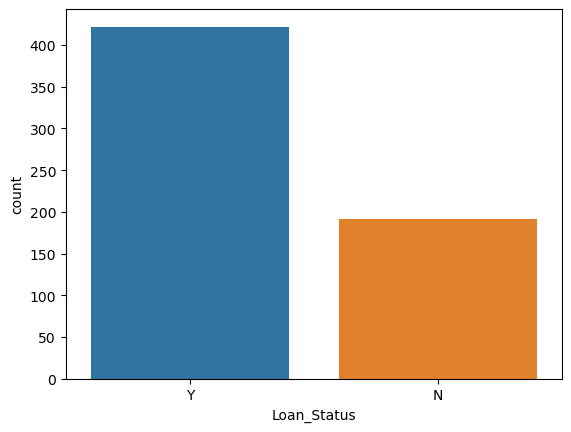

In [12]:
#Counts by Loan 'approved' and 'not approved'
print(df_loan['Loan_Status'].value_counts())
sns.countplot(x ='Loan_Status', data=df_loan)

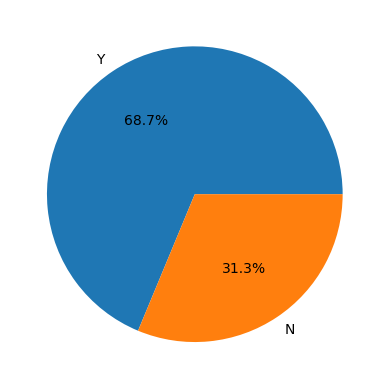

In [13]:
#pie plot representation of the Loan status
temp = df_loan['Loan_Status'].value_counts() 
plt.pie(temp.values, 
        labels=temp.index, 
        autopct='%1.1f%%') 
plt.show() 

Observation:

422 Loan were approved which constitute 69% of 614 applied for.

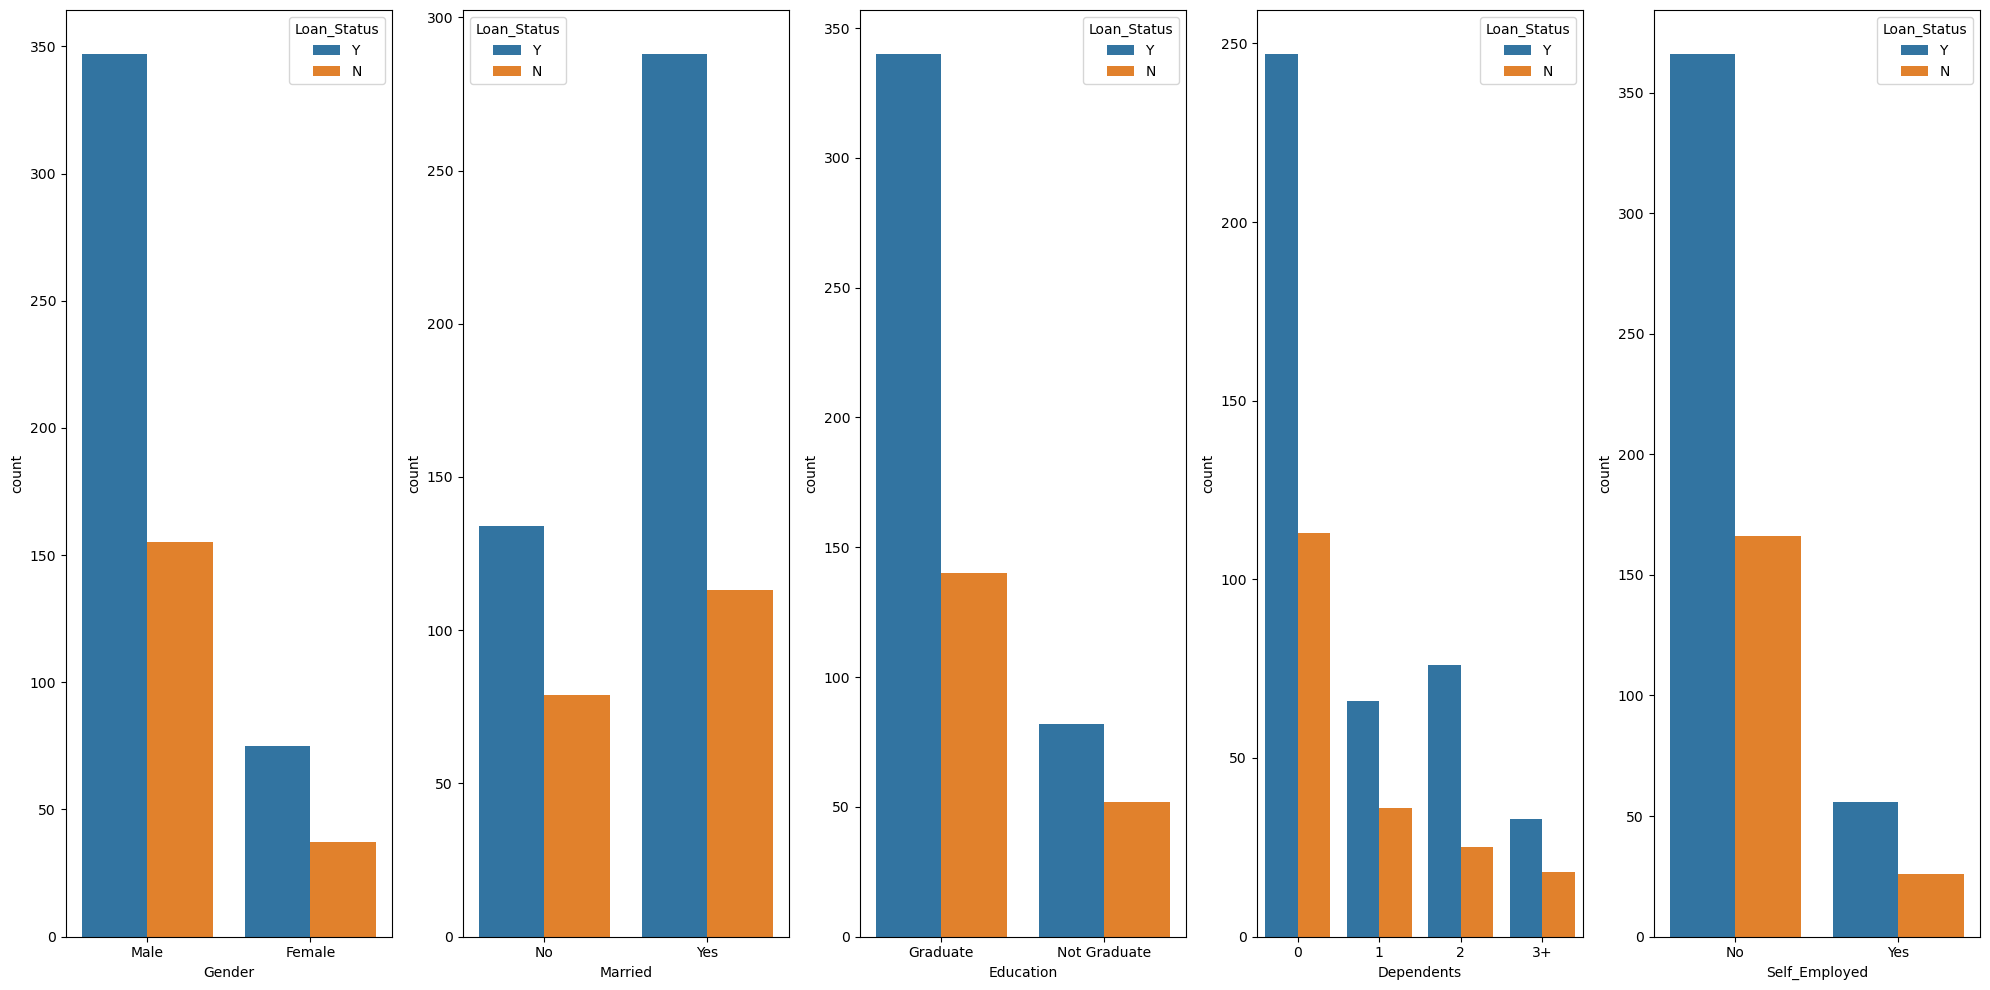

In [14]:
#Counts by Loan 'approved' and 'not approved'
plt.subplots(figsize=(20, 10)) 
for i, col in enumerate(['Gender', 'Married','Education', 'Dependents','Self_Employed']): 
    plt.subplot(1,5, i+1) 
    sns.countplot(data=df_loan, x=col, hue='Loan_Status') 
plt.tight_layout() 
plt.show() 

The diagram shows the the chances of getting loans approved based on Gender, Married, Education, Number of dependants and employment status.

In [15]:
#Convert categorical columns to numerical using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for col in categorical_columns:
    df_loan[col] = label_encoder.fit_transform(df_loan[col])


In [16]:
df_loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


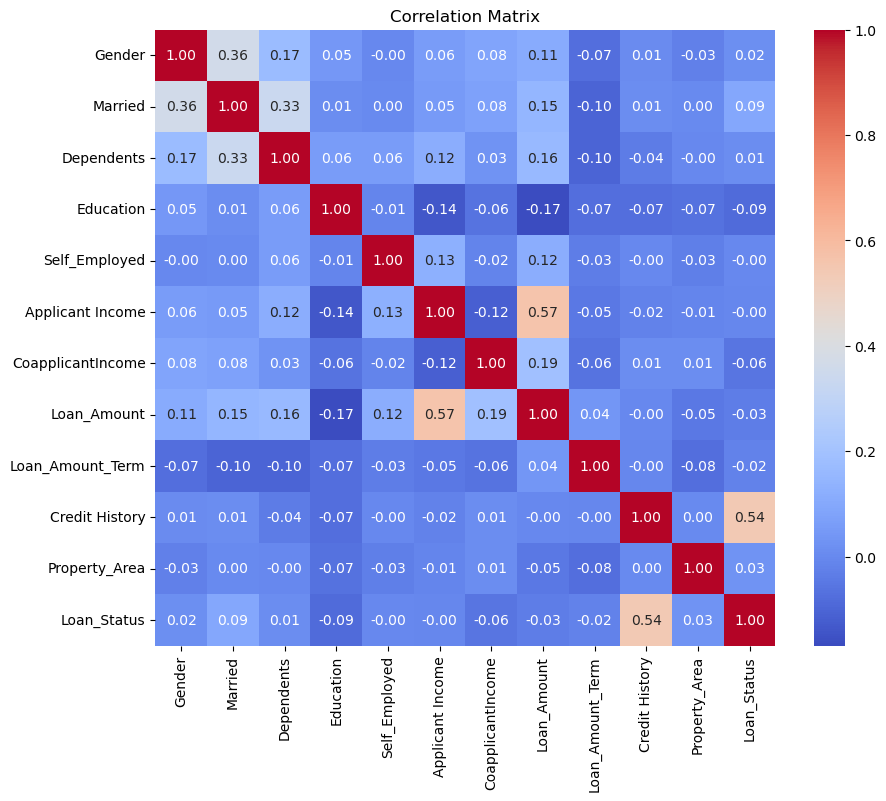

In [17]:
# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_loan.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



In [18]:
cor_loan =df_loan.corr()
cor_loan

,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106904,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146546,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163103,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.168759,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115100,-0.033739,-0.001550,-0.030860,-0.003700
Applicant Income,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565181,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189218,-0.059383,0.011134,0.010522,-0.059187
Loan_Amount,0.106904,0.146546,0.163103,-0.168759,0.115100,0.565181,0.189218,1.000000,0.036960,-0.000607,-0.046632,-0.033214
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.076120,-0.022549
Credit History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.001963,0.540556


In [19]:
#Statistical interpretation of the Dataset
df_loan.describe()

,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,145.752443,342.410423,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [20]:
cor_loan['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit History       0.540556
Married              0.091478
Property_Area        0.032112
Gender               0.017987
Dependents           0.010118
Self_Employed       -0.003700
Applicant Income    -0.004710
Loan_Amount_Term    -0.022549
Loan_Amount         -0.033214
CoapplicantIncome   -0.059187
Education           -0.085884
Name: Loan_Status, dtype: float64

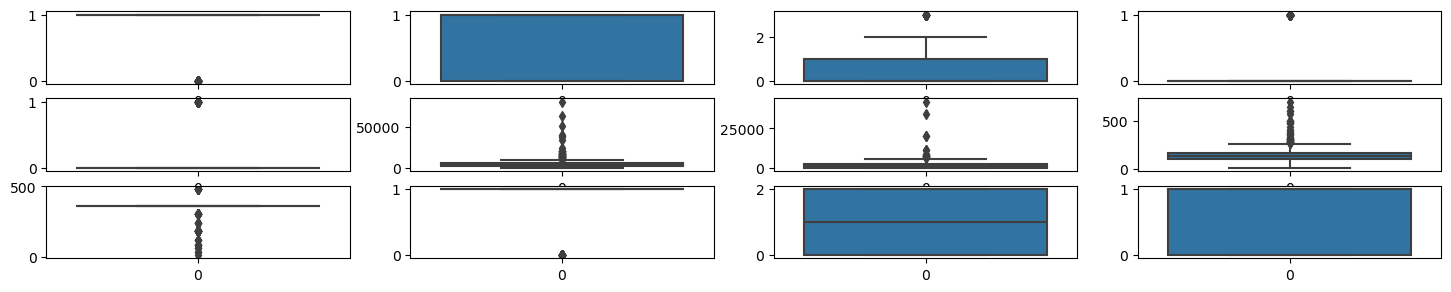

In [21]:
# Draw boxplot for each column.
plt.figure(figsize=(18,10))
for i in enumerate(df_loan.select_dtypes(exclude=['object']).columns):
    plt.subplot(9,4,i[0]+1)
    sns.boxplot(df_loan[i[1]])

In [22]:
#Removing Outlier
from scipy.stats import zscore

z=np.abs(zscore(df_loan[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Applicant Income', 'CoapplicantIncome', 'Loan_Amount',
       'Loan_Amount_Term', 'Credit History', 'Property_Area', 'Loan_Status']]))
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int64))


In [23]:
# Checking the shape of the dataset after outliers have been remove and reassigning the changed dataframe name to our original dataframe name
z = np.abs(zscore(df_loan[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Applicant Income', 'CoapplicantIncome', 'Loan_Amount',
       'Loan_Amount_Term', 'Credit History', 'Property_Area', 'Loan_Status']]))
threshold = 3
df1 = df_loan[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df_loan.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df_loan.shape[0]-df1.shape[0])/df_loan.shape[0]*100)

df_loan=df1.copy() 

Shape of the dataframe before removing outliers:  (614, 13)
Shape of the dataframe after removing outliers:  (577, 13)
Percentage of data loss post outlier removal:  6.026058631921824


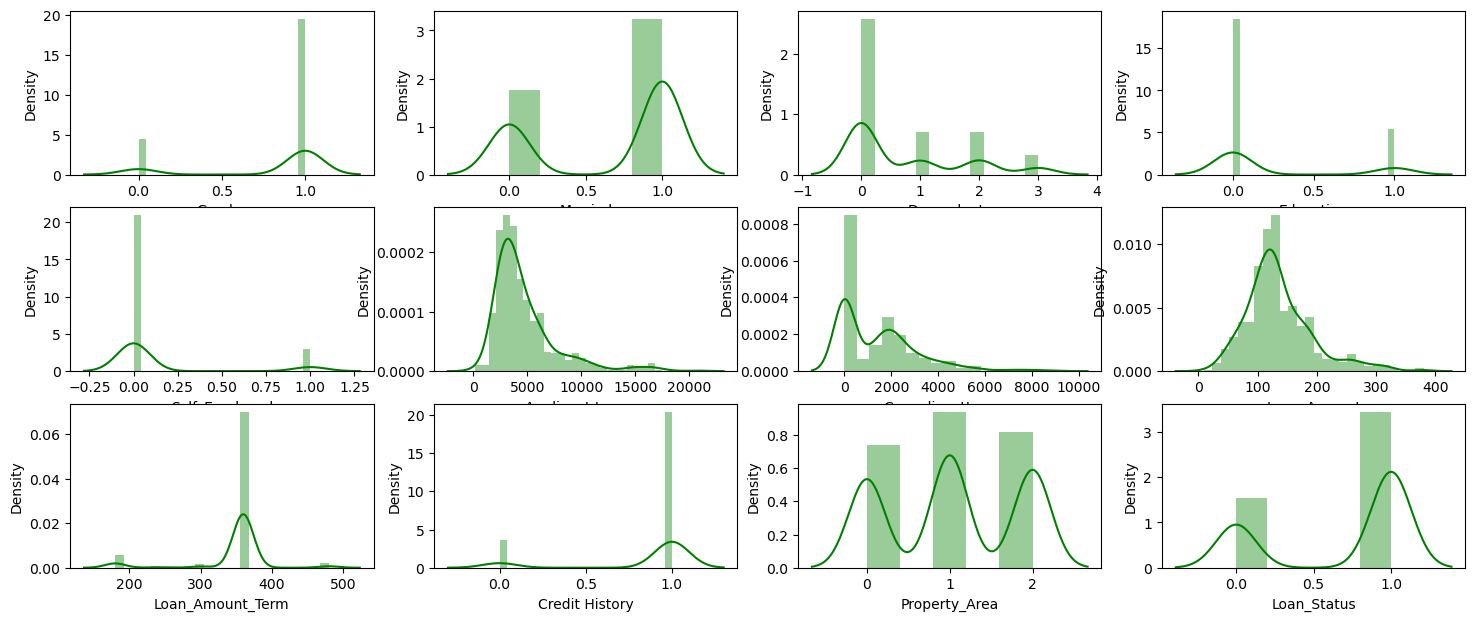

In [24]:
#checking skewing of the dataset distribution 
plt.figure(figsize=(18,20))
for i in enumerate(df_loan.select_dtypes(exclude=['object'])):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df_loan[i[1]],color='g')

In [25]:
df_loan.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
Applicant Income     2.148522
CoapplicantIncome    1.350517
Loan_Amount          1.151525
Loan_Amount_Term    -2.098806
Credit History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

Model Building

In [26]:
# Define the feature set and target variable
x = df_loan.drop(columns=['Loan_ID', 'Loan_Status'])
y = df_loan['Loan_Status']

Dataset Splitting and Training:

In [27]:
# Spliting the data into Train and Test Dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Model Training and Evaluation:

1. Stochastic Gradient Descent (SGD):

In [28]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(x_train, y_train)
Y_pred = sgd.predict(x_test)

sgd.score(x_train, y_train)

acc_sgd = round(sgd.score(x_train, y_train) * 100, 2)

acc_sgd

67.9

2. Random Forest:

In [29]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

Y_pred = random_forest.predict(x_test)

random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest

100.0

 3. Logistic Regression:

In [30]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

Y_pred = logreg.predict(x_test)

acc_log = round(logreg.score(x_train, y_train) * 100, 2)
acc_log

81.56

4. K Nearest Neighbor:

In [31]:
knn =KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train) 
Y_pred = knn.predict(x_test) 
acc_knn = round(knn.score(x_train, y_train) * 100, 2)
acc_knn

78.96

5. Gaussian Naive Bayes:

In [32]:
gaussian = GaussianNB() 
gaussian.fit(x_train, y_train)
Y_pred =gaussian.predict(x_test) 
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)
acc_gaussian

81.34

6. Perceptron: 

In [33]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(x_train, y_train)

Y_pred = perceptron.predict(x_test)

acc_perceptron = round(perceptron.score(x_train, y_train) * 100, 2)
acc_perceptron

67.9

7. Linear Support Vector Machine:

In [34]:
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)

Y_pred = linear_svc.predict(x_test)

acc_linear_svc = round(linear_svc.score(x_train, y_train) * 100, 2)
acc_linear_svc

51.63

8. Decision Tree:

In [35]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(x_train, y_train)  
Y_pred = decision_tree.predict(x_test)  
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

100.0

Which is the best Model?

In [36]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
100.00,Random Forest
100.00,Decision Tree
81.56,Logistic Regression
81.34,Naive Bayes
78.96,KNN
67.90,Perceptron
67.90,Stochastic Gradient Decent
51.63,Support Vector Machines


As we can see, Random Forest has the best Score ranked the 1st on the table, indicating the best model.

In [37]:
#cross validation for Random forest
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=42)
scores = cross_val_score(rf, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.89361702 0.82608696 0.80434783 0.7173913  0.73913043 0.76086957
 0.73913043 0.82608696 0.73913043 0.80434783]
Mean: 0.7850138760407029
Standard Deviation: 0.05233342409670874


In [38]:
from sklearn.model_selection import cross_val_score
rf = DecisionTreeClassifier(random_state=42)
scores = cross_val_score(rf, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.72340426 0.76086957 0.76086957 0.56521739 0.76086957 0.58695652
 0.7173913  0.76086957 0.63043478 0.7826087 ]
Mean: 0.7049491211840888
Standard Deviation: 0.07618030595908999


The Mean Score for Random forest Classifier Model has Mean Score 77% while that of the Decision Tree is 70%.Hence the Random forest give more accurate prediction.

In [39]:
#Saving the best model
import joblib
joblib.dump(random_forest, "Loan_Prediction.pkl")

['Loan_Prediction.pkl']

In [40]:
# PREDICTION OF TEST RESULT
y_pred = random_forest.predict(x_test)
print('Predictions:\n', y_pred)

Predictions:
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 0 1 0 1]


In [41]:
# COMPARING TEST DATA AND PREDICTED DATA
comparison_df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
print('Actual test data vs predicted: \n', comparison_df)

Actual test data vs predicted: 
      Actual  Predicted
122       1          0
414       0          0
544       1          1
105       1          1
461       1          1
..      ...        ...
215       1          1
78        0          0
251       0          1
258       0          0
570       1          1

[116 rows x 2 columns]


Accuracy: 83.62%
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.45      0.60        31
           1       0.83      0.98      0.90        85

    accuracy                           0.84       116
   macro avg       0.85      0.71      0.75       116
weighted avg       0.84      0.84      0.82       116



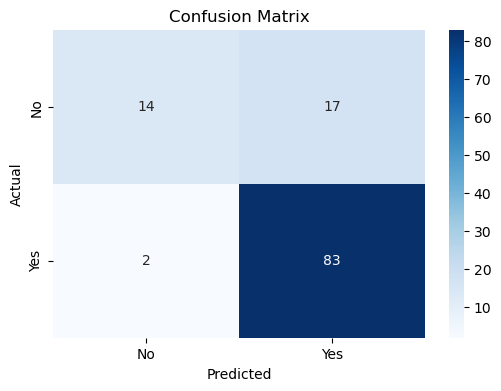

In [44]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()